In [70]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

# Sensitivity analysis and parameter selection

In [2]:
def get_run_risk_results(train_len, test_len):
    file_path = f"data/theoretical overview/Israel/{train_len}_{test_len}/accident_clusters_statistics_by_city.csv"
    cluster = pd.read_csv(file_path, usecols=["city",  "num_clusters", "Consistent Severity", "Improved Safety", "Severe Turnaround", "Stable Safety"], index_col="city")
    cluster.columns = "clusters SVR ISF ESV SAFE".split()
    cluster["minor"] = cluster.SAFE + cluster.ESV
    cluster["severe"] = cluster.SVR + cluster.ISF
    cluster.loc["total"]= cluster.sum()
    cluster = cluster["clusters minor severe SVR ISF ESV SAFE".split()]
    return (100. * cluster.loc["total", "ESV"] / (cluster.loc["total", "ESV"] + cluster.loc["total", "SAFE"]), 100. * cluster.loc["total", "SVR"] / (cluster.loc["total", "SVR"] + cluster.loc["total", "ISF"]) ) 

In [3]:
results = []
for train_len in [2, 3, 4, 5]:
        for test_len in [1, 2, 3]:
            risk = get_run_risk_results(train_len=train_len, test_len=test_len)
            results.append([train_len, test_len] + list(risk))

In [4]:
results = pd.DataFrame(results, columns="train_len test_len rm rs".split())
results["ratio"] = results.rm / results.rs 

In [5]:
results.pivot(index="train_len", columns="test_len", values="ratio")

test_len,1,2,3
train_len,,,
2,0.513948,0.553074,0.593923
3,0.485712,0.530901,0.581286
4,0.469634,0.525630,0.563520
5,0.467181,0.499063,0.529963


In [6]:
print((results.pivot(index="train_len", columns="test_len", values="ratio")*100).style.format(precision=2).to_latex())

\begin{tabular}{lrrr}
test_len & 1 & 2 & 3 \\
train_len &  &  &  \\
2 & 51.39 & 55.31 & 59.39 \\
3 & 48.57 & 53.09 & 58.13 \\
4 & 46.96 & 52.56 & 56.35 \\
5 & 46.72 & 49.91 & 53.00 \\
\end{tabular}



In [7]:
results.pivot(index="train_len", columns="test_len", values="rm")

test_len,1,2,3
train_len,,,
2,8.462240,16.006403,21.821366
3,7.041746,12.856134,17.520094
4,5.540893,10.159047,13.684647
5,4.533554,8.095221,10.814842


In [8]:
print(results.pivot(index="train_len", columns="test_len", values="rm").style.format(precision=2).to_latex())

\begin{tabular}{lrrr}
test_len & 1 & 2 & 3 \\
train_len &  &  &  \\
2 & 8.46 & 16.01 & 21.82 \\
3 & 7.04 & 12.86 & 17.52 \\
4 & 5.54 & 10.16 & 13.68 \\
5 & 4.53 & 8.10 & 10.81 \\
\end{tabular}



In [9]:
results.pivot(index="train_len", columns="test_len", values="rs")

test_len,1,2,3
train_len,,,
2,16.465152,28.940816,36.741046
3,14.497779,24.215671,30.140229
4,11.798331,19.327385,24.284230
5,9.704061,16.220836,20.406800


In [10]:
print(results.pivot(index="train_len", columns="test_len", values="rs").style.format(precision=2).to_latex())

\begin{tabular}{lrrr}
test_len & 1 & 2 & 3 \\
train_len &  &  &  \\
2 & 16.47 & 28.94 & 36.74 \\
3 & 14.50 & 24.22 & 30.14 \\
4 & 11.80 & 19.33 & 24.28 \\
5 & 9.70 & 16.22 & 20.41 \\
\end{tabular}



# Main

In [11]:
# The chosen parameter values are:
train_len = test_len = 3 
base_dir = "data/theoretical overview/Israel/"
use_dir = os.path.join(base_dir, f"{train_len}_{test_len}/")
REMOVE_CITY_NAMES = True

## Taxonomy

In [12]:
table = pd.DataFrame([["SVR", "ISF"] ,["ESV", "SAFE"]], index=["train severe", "train minor"], columns=["test severe", "test minor"])
print(table.to_latex())

\begin{tabular}{lll}
\toprule
 & test severe & test minor \\
\midrule
train severe & SVR & ISF \\
train minor & ESV & SAFE \\
\bottomrule
\end{tabular}



In [13]:
# 2019 population (X1000)
pop2019 = {'Jerusalem': 936.0,
 'Tel Aviv - Yafo': 461.0,
 'Haifa': 285.0,
 'Rishon LeZiyyon': 254.0,
 'Petah Tiqwa': 248.0,
 'Ashdod': 226.0,
 'Netanya': 221.0,
 "Be'er Sheva": 210.0,
 'Bene Beraq': 205.0,
 'Holon': 196.0,
 'Ramat Gan': 163.0,
 'Ashqelon': 144.0,
 'Rehovot': 144.0,
 'Bat Yam': 129.0,
 'Bet Shemesh': 125.0,
 'Kefar Sava': 101.0,
 'Herzliyya': 97.0,
 'Hadera': 97.0,
 "Modi'in-Makkabbim-Re'ut": 93.0,
 'Lod': 77.0}

## City table 

In [14]:

city = pd.read_csv(base_dir+"accident_statistics_by_city.csv", index_col=0)
city["total_minor"] = city.PDO + city.light 
city["total_severe"] = city.severe + city.fatality
city["population"] = pd.Series(pop2019)
city = city["population PDO light severe fatality total_minor total_severe total_accidents".split()]
city.sort_values("population", ascending=False, inplace=True)

In [15]:
city_codes = pd.Series(city.index, index=[f"city-{i+1}" for i in range(city.shape[0])])

In [16]:
"; ".join([f"{c}: {v}" for c, v in zip(city_codes.index, city_codes.values)])

"city-1: Jerusalem; city-2: Tel Aviv - Yafo; city-3: Haifa; city-4: Rishon LeZiyyon; city-5: Petah Tiqwa; city-6: Ashdod; city-7: Netanya; city-8: Be'er Sheva; city-9: Bene Beraq; city-10: Holon; city-11: Ramat Gan; city-12: Ashqelon; city-13: Rehovot; city-14: Bat Yam; city-15: Bet Shemesh; city-16: Kefar Sava; city-17: Herzliyya; city-18: Hadera; city-19: Modi'in-Makkabbim-Re'ut; city-20: Lod"

In [17]:
if REMOVE_CITY_NAMES:
    city.index = city_codes.index 

In [18]:
city.loc["total"]= city.sum()

In [19]:
city

,population,PDO,light,severe,fatality,total_minor,total_severe,total_accidents
city-1,936.0,291.416667,446.500000,67.166667,4.666667,737.916667,71.833333,809.750000
city-2,461.0,1034.666667,1061.000000,136.083333,12.916667,2095.666667,149.000000,2244.666667
city-3,285.0,183.666667,308.333333,44.083333,5.666667,492.000000,49.750000,541.750000
city-4,254.0,422.750000,186.750000,19.833333,2.500000,609.500000,22.333333,631.833333
city-5,248.0,245.750000,251.916667,22.500000,4.416667,497.666667,26.916667,524.583333
city-6,226.0,178.416667,188.833333,16.916667,2.500000,367.250000,19.416667,386.666667
city-7,221.0,164.166667,157.416667,13.500000,2.583333,321.583333,16.083333,337.666667
city-8,210.0,138.083333,236.500000,14.666667,2.166667,374.583333,16.833333,391.416667
city-9,205.0,126.833333,137.583333,18.666667,1.333333,264.416667,20.000000,284.416667
city-10,196.0,243.833333,248.916667,21.166667,2.166667,492.750000,23.333333,516.083333


In [20]:
print(city.style.format(precision=0).to_latex())

\begin{tabular}{lrrrrrrrr}
 & population & PDO & light & severe & fatality & total_minor & total_severe & total_accidents \\
city-1 & 936 & 291 & 446 & 67 & 5 & 738 & 72 & 810 \\
city-2 & 461 & 1035 & 1061 & 136 & 13 & 2096 & 149 & 2245 \\
city-3 & 285 & 184 & 308 & 44 & 6 & 492 & 50 & 542 \\
city-4 & 254 & 423 & 187 & 20 & 2 & 610 & 22 & 632 \\
city-5 & 248 & 246 & 252 & 22 & 4 & 498 & 27 & 525 \\
city-6 & 226 & 178 & 189 & 17 & 2 & 367 & 19 & 387 \\
city-7 & 221 & 164 & 157 & 14 & 3 & 322 & 16 & 338 \\
city-8 & 210 & 138 & 236 & 15 & 2 & 375 & 17 & 391 \\
city-9 & 205 & 127 & 138 & 19 & 1 & 264 & 20 & 284 \\
city-10 & 196 & 244 & 249 & 21 & 2 & 493 & 23 & 516 \\
city-11 & 163 & 185 & 178 & 25 & 2 & 363 & 27 & 390 \\
city-12 & 144 & 164 & 104 & 11 & 2 & 268 & 12 & 281 \\
city-13 & 144 & 129 & 113 & 8 & 2 & 242 & 10 & 252 \\
city-14 & 129 & 152 & 178 & 18 & 2 & 329 & 21 & 350 \\
city-15 & 125 & 17 & 17 & 4 & 0 & 34 & 4 & 38 \\
city-16 & 101 & 69 & 84 & 5 & 1 & 153 & 6 & 158 \\
city-17 

In [34]:
8759*12

105108

## Accdients and exact locations

In [21]:
locs = pd.read_csv(base_dir+"location_accuracy.csv", index_col=0).reset_index()
locs = locs["STATUS_IGUN HUMRAT_TEUNA count".split()]
locs = locs.pivot(index="HUMRAT_TEUNA", columns="STATUS_IGUN", values="count")
locs.columns = ["Exact", "City", "Road"]
locs.index = "property_damage light severe fatality".split()[::-1]
locs.sum().sum()

353726

In [22]:
locs

,Exact,City,Road
fatality,647,21,277
severe,5683,471,2715
light,49938,2294,20709
property_damage,48841,47531,174599


In [23]:
print(f"Total crashes [20 cities]: {locs.sum().sum()}")
print("Of them by severity:")
print("-"*30)
print(locs.T.sum())
print("-"*30)
print(f"With exact location: {locs.sum()['Exact']}")
print("By severity")
print("-"*30)
print(locs["Exact"])
print("-"*30)


Total crashes [20 cities]: 353726
Of them by severity:
------------------------------
fatality              945
severe               8869
light               72941
property_damage    270971
dtype: int64
------------------------------
With exact location: 105109
By severity
------------------------------
fatality             647
severe              5683
light              49938
property_damage    48841
Name: Exact, dtype: int64
------------------------------


In [47]:
105109 / 353726 * 100 

29.714807506374992

In [24]:
city.loc['total', 'total_accidents'], locs.sum()["Exact"] / 12

(8759.083333333334, 8759.083333333334)

In [25]:
locs.loc["fatality"] = locs.loc["fatality"] / locs.loc["fatality"].sum() * 100 
locs.loc["severe"] = locs.loc["severe"] / locs.loc["severe"].sum() * 100 
locs.loc["light"] = locs.loc["light"] / locs.loc["light"].sum() * 100 
locs.loc["property_damage"] = locs.loc["property_damage"] / locs.loc["property_damage"].sum() * 100 

locs = locs["Exact Road City".split()]

locs

/var/folders/7_/f6wkwgnn5cj_vwzpbz33k18w0000gn/T/ipykernel_97214/1749245313.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '68.46560846560847' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  locs.loc["fatality"] = locs.loc["fatality"] / locs.loc["fatality"].sum() * 100
/var/folders/7_/f6wkwgnn5cj_vwzpbz33k18w0000gn/T/ipykernel_97214/1749245313.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.2222222222222223' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  locs.loc["fatality"] = locs.loc["fatality"] / locs.loc["fatality"].sum() * 100
/var/folders/7_/f6wkwgnn5cj_vwzpbz33k18w0000gn/T/ipykernel_97214/1749245313.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '29.31216931216931' has dt

,Exact,Road,City
fatality,68.465608,29.312169,2.222222
severe,64.077123,30.612245,5.310633
light,68.463553,28.391440,3.145008
property_damage,18.024438,64.434570,17.540991


In [26]:
print(locs.style.format(precision=0).to_latex())

\begin{tabular}{lrrr}
 & Exact & Road & City \\
fatality & 68 & 29 & 2 \\
severe & 64 & 31 & 5 \\
light & 68 & 28 & 3 \\
property_damage & 18 & 64 & 18 \\
\end{tabular}



## Clusters

In [80]:
# place-holder for clsuters table
# cluster = pd.DataFrame(index=[f"city-{i}" for i in range(20)], columns="clusters SVR ISF ESV SAFE".split()).fillna("XXX")
# cluster.index.name = "city"
# cluster.head()
cluster = pd.read_csv(use_dir+"accident_clusters_statistics_by_city.csv", usecols=["city",  "num_clusters", "Consistent Severity", "Improved Safety", "Severe Turnaround", "Stable Safety"], index_col="city")
cluster.columns = "clusters SVR ISF ESV SAFE".split()
cluster["minor"] = cluster.SAFE + cluster.ESV
cluster["severe"] = cluster.SVR + cluster.ISF

if REMOVE_CITY_NAMES:
    cluster = cluster.join(city_codes.reset_index().set_index("city")).set_index("index")

    def sort_f(index):
        return [int(v.split("-")[1]) for v in index]
    
    cluster.sort_index(inplace=True, ascending=True, key=sort_f)
    
cluster.loc["total"]= cluster.sum()
cluster = cluster["clusters minor severe SVR ISF ESV SAFE".split()]

# percentages 
cluster.SVR = (cluster.SVR / cluster.clusters * 100).round(2)
cluster.ISF = (cluster.ISF / cluster.clusters * 100).round(2) 
cluster.ESV = (cluster.ESV / cluster.clusters * 100).round(2) 
cluster.SAFE = (cluster.SAFE / cluster.clusters * 100).round(2) 
cluster 


,clusters,minor,severe,SVR,ISF,ESV,SAFE
index,,,,,,,
city-1,227.22,147.67,79.56,11.83,23.18,14.47,50.51
city-2,740.22,506.56,233.67,11.18,20.38,15.13,53.30
city-3,146.78,105.89,40.89,4.92,22.94,12.19,59.95
city-4,197.00,163.56,33.44,5.19,11.79,12.18,70.84
city-5,170.44,133.56,36.89,6.98,14.67,9.91,68.45
city-6,117.56,83.56,34.00,8.98,19.94,13.52,57.56
city-7,110.56,89.56,21.00,4.52,14.47,11.76,69.25
city-8,121.56,98.45,23.11,4.38,14.63,13.80,67.18
city-9,96.44,69.67,26.78,8.18,19.59,13.02,59.22


In [81]:
print(cluster.style.format(precision=2).to_latex())

\begin{tabular}{lrrrrrrr}
 & clusters & minor & severe & SVR & ISF & ESV & SAFE \\
index &  &  &  &  &  &  &  \\
city-1 & 227.22 & 147.67 & 79.56 & 11.83 & 23.18 & 14.47 & 50.51 \\
city-2 & 740.22 & 506.56 & 233.67 & 11.18 & 20.38 & 15.13 & 53.30 \\
city-3 & 146.78 & 105.89 & 40.89 & 4.92 & 22.94 & 12.19 & 59.95 \\
city-4 & 197.00 & 163.56 & 33.44 & 5.19 & 11.79 & 12.18 & 70.84 \\
city-5 & 170.44 & 133.56 & 36.89 & 6.98 & 14.67 & 9.91 & 68.45 \\
city-6 & 117.56 & 83.56 & 34.00 & 8.98 & 19.94 & 13.52 & 57.56 \\
city-7 & 110.56 & 89.56 & 21.00 & 4.52 & 14.47 & 11.76 & 69.25 \\
city-8 & 121.56 & 98.45 & 23.11 & 4.38 & 14.63 & 13.80 & 67.18 \\
city-9 & 96.44 & 69.67 & 26.78 & 8.18 & 19.59 & 13.02 & 59.22 \\
city-10 & 177.44 & 140.56 & 36.88 & 3.63 & 17.16 & 10.52 & 68.69 \\
city-11 & 135.44 & 96.89 & 38.55 & 8.45 & 20.02 & 15.34 & 56.19 \\
city-12 & 76.22 & 58.33 & 17.89 & 8.16 & 15.31 & 12.98 & 63.55 \\
city-13 & 85.11 & 72.22 & 12.89 & 3.40 & 11.75 & 9.79 & 75.07 \\
city-14 & 122.67 & 86

## Risk table

In [78]:
risk = pd.read_csv(use_dir+"accident_clusters_statistics_by_city.csv", index_col="city", usecols="city severe_turnaround_probability consistent_severe_probability".split())
risk.columns = ["minor", "severe"]


if REMOVE_CITY_NAMES:
    risk = risk.join(city_codes.reset_index().set_index("city")).set_index("index")
    risk.sort_index(inplace=True, ascending=True, key=sort_f)

risk.loc["city mean"]= risk.mean()
risk.loc["weighted mean"] = (100. * cluster.loc["total", "ESV"] / (cluster.loc["total", "ESV"] + cluster.loc["total", "SAFE"]), 100. * cluster.loc["total", "SVR"] / (cluster.loc["total", "SVR"] + cluster.loc["total", "ISF"]) )

risk["ratio"] = 100. * risk.minor / risk.severe 

risk.fillna(0, inplace=True)

risk

,minor,severe,ratio
index,,,
city-1,22.270000,33.800000,65.887574
city-2,22.110000,35.430000,62.404742
city-3,16.890000,17.660000,95.639864
city-4,14.670000,30.560000,48.003927
city-5,12.650000,32.230000,39.249147
city-6,19.020000,31.050000,61.256039
city-7,14.520000,23.810000,60.982780
city-8,17.040000,23.080000,73.830156
city-9,18.020000,29.460000,61.167685


In [79]:
print(risk.style.format(precision=2).to_latex())

\begin{tabular}{lrrr}
 & minor & severe & ratio \\
index &  &  &  \\
city-1 & 22.27 & 33.80 & 65.89 \\
city-2 & 22.11 & 35.43 & 62.40 \\
city-3 & 16.89 & 17.66 & 95.64 \\
city-4 & 14.67 & 30.56 & 48.00 \\
city-5 & 12.65 & 32.23 & 39.25 \\
city-6 & 19.02 & 31.05 & 61.26 \\
city-7 & 14.52 & 23.81 & 60.98 \\
city-8 & 17.04 & 23.08 & 73.83 \\
city-9 & 18.02 & 29.46 & 61.17 \\
city-10 & 13.28 & 17.47 & 76.02 \\
city-11 & 21.44 & 29.68 & 72.24 \\
city-12 & 16.95 & 34.78 & 48.73 \\
city-13 & 11.54 & 22.41 & 51.49 \\
city-14 & 17.59 & 33.85 & 51.96 \\
city-15 & 4.35 & 0.00 & inf \\
city-16 & 8.11 & 13.24 & 61.25 \\
city-17 & 12.84 & 27.83 & 46.14 \\
city-18 & 19.90 & 24.79 & 80.27 \\
city-19 & 5.38 & 24.14 & 22.29 \\
city-20 & 18.22 & 10.14 & 179.68 \\
city mean & 15.34 & 24.77 & 61.93 \\
weighted mean & 17.52 & 30.14 & 58.12 \\
\end{tabular}



In [77]:
risk.replace(0, np.nan).replace(np.inf, np.nan).describe()

,minor,severe,ratio
count,22.000000,21.000000,21.000000
mean,15.438579,26.205872,65.645388
std,4.898535,7.099437,30.364301
min,4.350000,10.140000,22.286661
25%,12.950000,23.080000,51.494868
50%,16.920000,27.830000,61.253776
75%,18.170000,31.050000,72.237197
max,22.270000,35.430000,179.684418


In [31]:
risk.corr()

,minor,severe,ratio
minor,1.000000,0.597675,0.381895
severe,0.597675,1.000000,-0.602199
ratio,0.381895,-0.602199,1.000000


<Axes: xlabel='minor', ylabel='severe'>

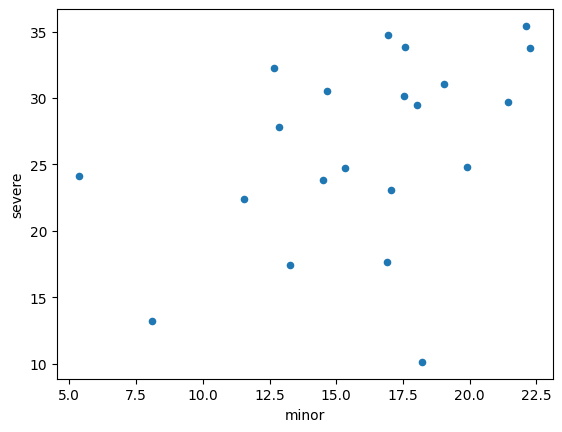

In [32]:
risk.drop("city-15", axis=0).plot(kind="scatter", x="minor", y="severe")

In [33]:
pearsonr(risk.minor, risk.severe)

PearsonRResult(statistic=0.5976747334008538, pvalue=0.0033087790739161106)

In [45]:
12.98/(12.98+7.81) * 100 

62.433862433862444

# Outliers

In [50]:
out = pd.read_csv(use_dir+"outliers_percentage.csv")
out["inn"] = out.total_count_train - out.outliers_count_train
out["is-minor"] = out.HUMRAT_TEUNA > 2 
out

,HUMRAT_TEUNA,total_count_train,outliers_count_train,percentage_outliers_train,total_count_test,outliers_count_test,percentage_outliers_test,inn,is-minor
0,1,149.285714,58.571429,39.218439,162.714286,82.285714,50.560829,90.714286,False
1,2,1227.000000,479.857143,39.418225,1541.571429,805.000000,52.301668,747.142857,False
2,3,12196.857143,3841.285714,31.493028,11709.285714,5332.428571,45.516517,8355.571429,True
3,4,12814.285714,5178.857143,40.312254,15637.285714,8611.857143,55.212342,7635.428571,True


In [52]:
out.inn.sum() / out.total_count_train.sum() * 100 

63.776040538784706

In [53]:
out[out["is-minor"]].inn.sum() / out[out["is-minor"]].total_count_train.sum() * 100

63.935503032933894

In [54]:
out[~out["is-minor"]].inn.sum() / out[~out["is-minor"]].total_count_train.sum() * 100


60.87813992111273